In [1]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import csv
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns


C:\Users\10411\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\10411\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\10411\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [3]:
df=df.fillna('N')
testdf=testdf.fillna('N')

In [4]:
from sklearn.preprocessing import LabelEncoder
df[['ecfg']]=df[['ecfg']].apply(LabelEncoder().fit_transform)
df[['flbmk']]=df[['flbmk']].apply(LabelEncoder().fit_transform)
df[['flg_3dsmk']]=df[['flg_3dsmk']].apply(LabelEncoder().fit_transform)
df[['insfg']]=df[['insfg']].apply(LabelEncoder().fit_transform)
df[['ovrlt']]=df[['ovrlt']].apply(LabelEncoder().fit_transform)


In [5]:
from sklearn.preprocessing import LabelEncoder
testdf[['ecfg']]=testdf[['ecfg']].apply(LabelEncoder().fit_transform)
testdf[['flbmk']]=testdf[['flbmk']].apply(LabelEncoder().fit_transform)
testdf[['flg_3dsmk']]=testdf[['flg_3dsmk']].apply(LabelEncoder().fit_transform)
testdf[['insfg']]=testdf[['insfg']].apply(LabelEncoder().fit_transform)
testdf[['ovrlt']]=testdf[['ovrlt']].apply(LabelEncoder().fit_transform)

In [6]:
df1=df.values
df2=testdf.values

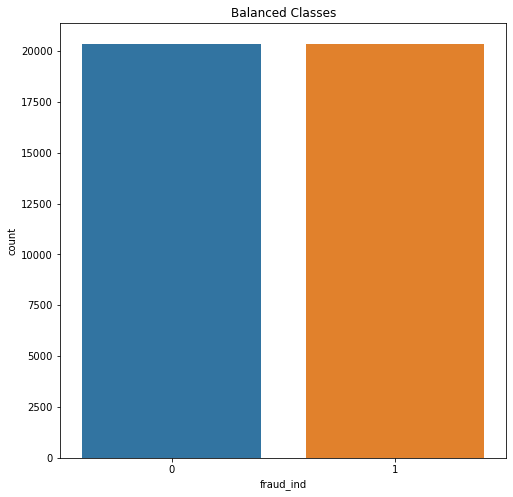

In [7]:
fraud_df = df.loc[df['fraud_ind'] == 1]

non_fraud_df = df.loc[df['fraud_ind'] == 0].sample(n=20355,random_state=42)

normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('fraud_ind', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [8]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

In [9]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df['fraud_ind']
X_train = df.drop(['fraud_ind'], axis=1, inplace=False)

y_test = testdf['fraud_ind']
X_test = testdf.drop(['fraud_ind'], axis=1, inplace=False)

#Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)
print('bbc.score:',bbc.score(X_test,y_test))
#tree_predictions = tree.predict(X_test)
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

bbc.score: 0.952311360058037
[[357257  18118]
 [    25   5047]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.98    375375
           1       0.22      1.00      0.36      5072

    accuracy                           0.95    380447
   macro avg       0.61      0.97      0.67    380447
weighted avg       0.99      0.95      0.97    380447



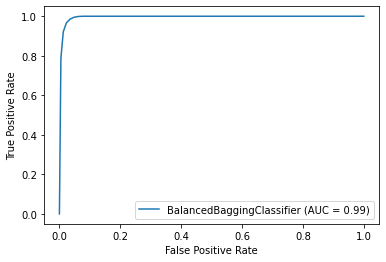

In [11]:
from sklearn.metrics import plot_roc_curve
bbc_disp = plot_roc_curve(bbc, X_test, y_test)
plt.show()

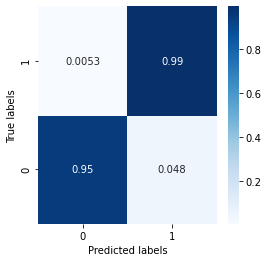

In [20]:
import seaborn as sns
con_mat = confusion_matrix(y_test, preds)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=5)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()